In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("salaries.csv")
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025,EX,FT,Head of Data,348516,USD,348516,US,0,US,M
1,2025,EX,FT,Head of Data,232344,USD,232344,US,0,US,M
2,2025,SE,FT,Data Scientist,145400,USD,145400,US,0,US,M
3,2025,SE,FT,Data Scientist,81600,USD,81600,US,0,US,M
4,2025,MI,FT,Engineer,160000,USD,160000,US,100,US,M


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151445 entries, 0 to 151444
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   work_year           151445 non-null  int64 
 1   experience_level    151445 non-null  object
 2   employment_type     151445 non-null  object
 3   job_title           151445 non-null  object
 4   salary              151445 non-null  int64 
 5   salary_currency     151445 non-null  object
 6   salary_in_usd       151445 non-null  int64 
 7   employee_residence  151445 non-null  object
 8   remote_ratio        151445 non-null  int64 
 9   company_location    151445 non-null  object
 10  company_size        151445 non-null  object
dtypes: int64(4), object(7)
memory usage: 12.7+ MB


In [4]:
df.describe()


,work_year,salary,salary_in_usd,remote_ratio
count,151445.000000,1.514450e+05,151445.000000,151445.000000
mean,2024.435313,1.628380e+05,157527.458411,20.938625
std,0.671842,2.080124e+05,74150.772377,40.620393
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2024.000000,1.060000e+05,105800.000000,0.000000
50%,2025.000000,1.470000e+05,146100.000000,0.000000
75%,2025.000000,1.990000e+05,198000.000000,0.000000
max,2025.000000,3.040000e+07,800000.000000,100.000000


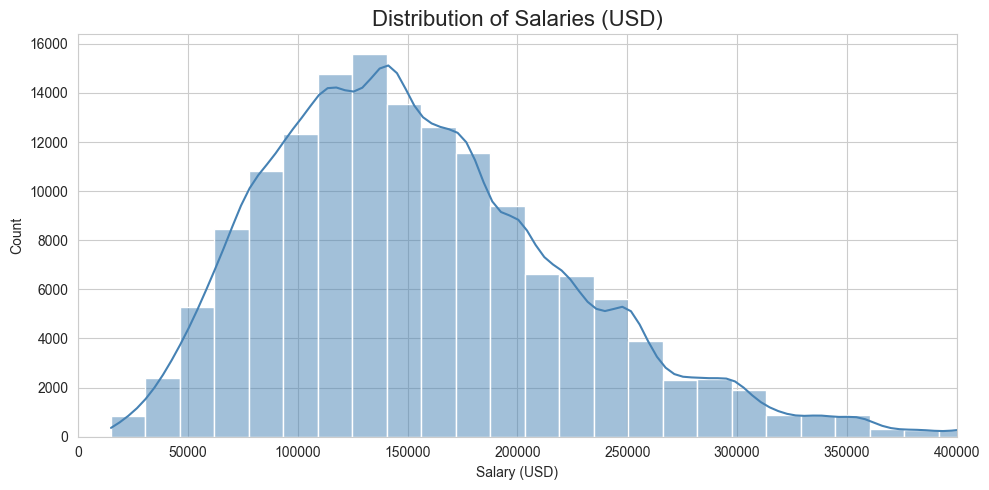

In [5]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 5))
sns.histplot(df["salary_in_usd"], bins=50, kde=True, color="steelblue")
plt.title("Distribution of Salaries (USD)", fontsize=16)
plt.xlabel("Salary (USD)")
plt.ylabel("Count")
plt.xlim(0, 400000)
plt.tight_layout()
plt.show()

/var/folders/rc/bpl9g9g904x3b61f864qzddh0000gn/T/ipykernel_65263/2825842167.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="experience_level", y="salary_in_usd", order=order, palette="viridis")


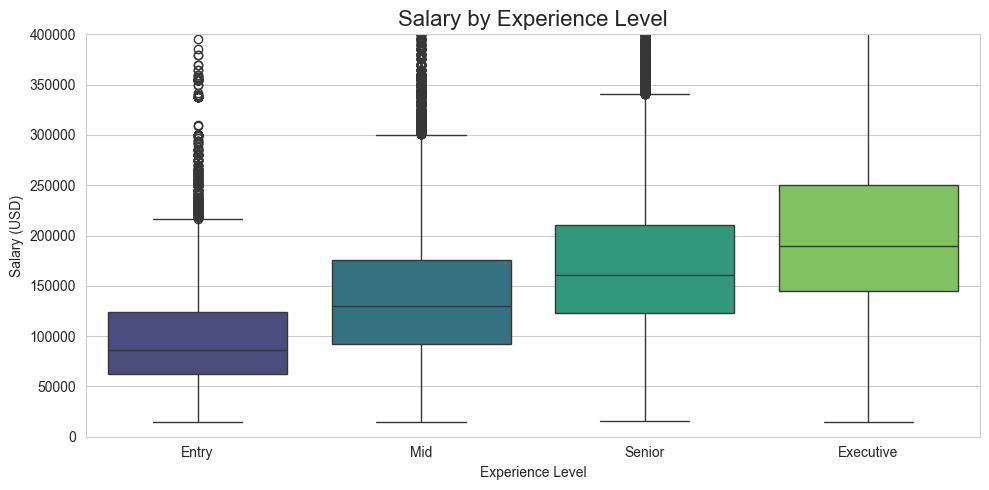

In [6]:
order = ["EN", "MI", "SE", "EX"]
labels = ["Entry", "Mid", "Senior", "Executive"]

plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x="experience_level", y="salary_in_usd", order=order, palette="viridis")
plt.xticks(range(4), labels)
plt.title("Salary by Experience Level", fontsize=16)
plt.xlabel("Experience Level")
plt.ylabel("Salary (USD)")
plt.ylim(0, 400000)
plt.tight_layout()
plt.show()

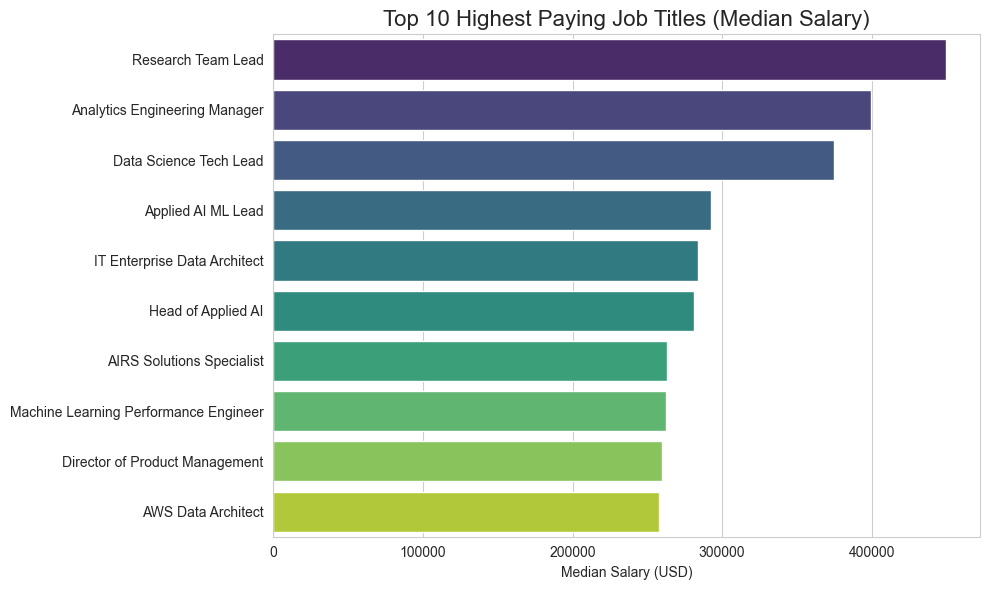

In [7]:
top_jobs = df.groupby("job_title")["salary_in_usd"].median().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_jobs.values, y=top_jobs.index, hue=top_jobs.index, palette="viridis", legend=False)
plt.title("Top 10 Highest Paying Job Titles (Median Salary)", fontsize=16)
plt.xlabel("Median Salary (USD)")
plt.ylabel("")
plt.tight_layout()
plt.show()

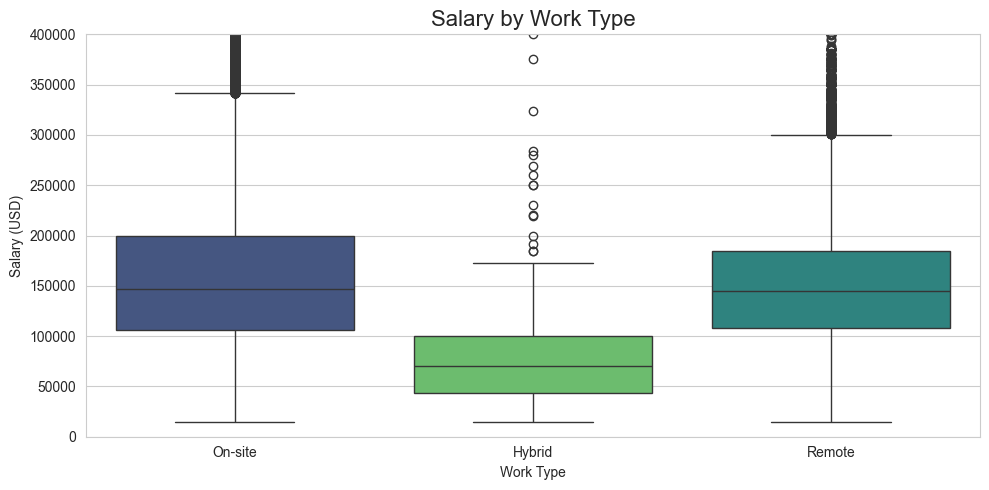

In [8]:
df["work_type"] = df["remote_ratio"].map({0: "On-site", 50: "Hybrid", 100: "Remote"})

plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x="work_type", y="salary_in_usd", order=["On-site", "Hybrid", "Remote"], hue="work_type", palette="viridis", legend=False)
plt.title("Salary by Work Type", fontsize=16)
plt.xlabel("Work Type")
plt.ylabel("Salary (USD)")
plt.ylim(0, 400000)
plt.tight_layout()
plt.show()

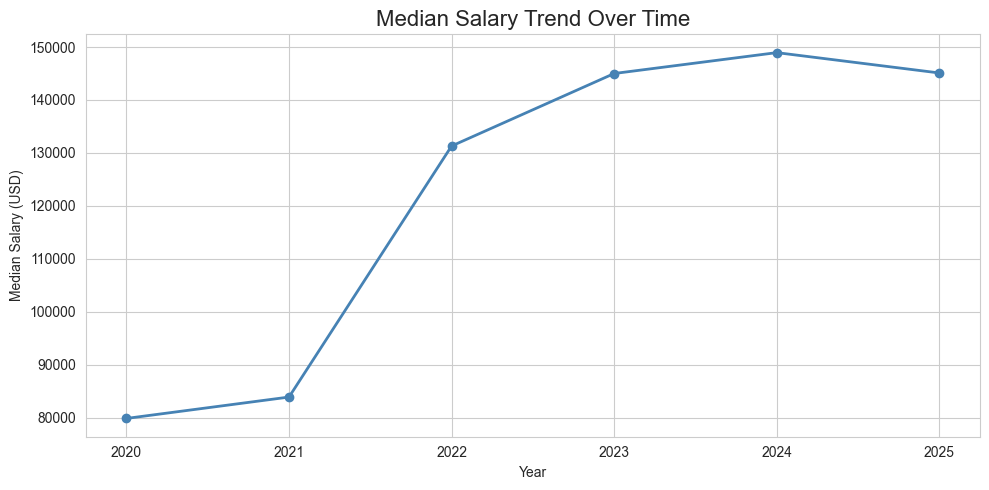

In [9]:
yearly = df.groupby("work_year")["salary_in_usd"].median()

plt.figure(figsize=(10, 5))
plt.plot(yearly.index, yearly.values, marker="o", color="steelblue", linewidth=2)
plt.title("Median Salary Trend Over Time", fontsize=16)
plt.xlabel("Year")
plt.ylabel("Median Salary (USD)")
plt.xticks(yearly.index)
plt.tight_layout()
plt.show()